Demonstrates the functionality of this using existing tile datasets.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from tile_mate import get_raster_from_tiles
from tile_mate.stitcher import DATASET_SHORTNAMES
from rasterio.plot import show
from matplotlib.colors import ListedColormap
import numpy as np
from tile_mate.stitcher import HANSEN_MOSAIC_YEARS
import matplotlib.pyplot as plt

In [3]:
DATASET_SHORTNAMES

['pekel_water_occ_2021',
 'esa_world_cover_2020',
 'esa_world_cover_2021',
 'hansen_annual_mosaic',
 'hansen_lossyear',
 'hansen_gain',
 'hansen_treecover_2000',
 's1_coherence_2020',
 'radd_deforestation_alerts_2022',
 'hand',
 'glad_landcover',
 'glad_change',
 'umd_ocean_mask']

# ESA 2021 Worldcover

In [4]:
%%time

bounds = [-120.55, 34.85, -120.25, 35.15]

X, p = get_raster_from_tiles(bounds, tile_shortname='esa_world_cover_2021')
X.shape

Reading tile metadata: 100%|█| 1/1 [00:00<00:00, 8405.42it/s
Reading tile imagery: 100%|███| 1/1 [00:01<00:00,  1.60s/it]


CPU times: user 498 ms, sys: 129 ms, total: 627 ms
Wall time: 8.24 s


(1, 3600, 3600)

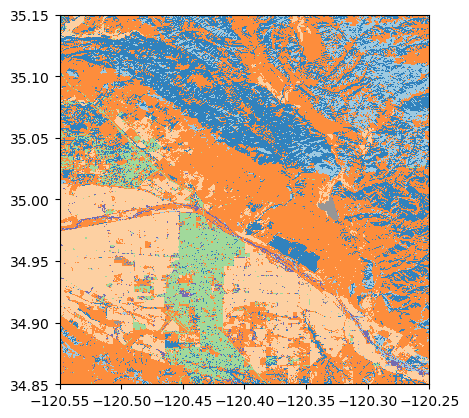

<Axes: >

In [5]:
show(X, transform=p['transform'], cmap='tab20c', interpolation='none')

In [6]:
import rasterio

with rasterio.open('esa_worlf_cover_2021_subset.tif', 'w', **p) as ds:
   ds.write(X)

# Hansen 

## Annual Landsat Mosaic

In [7]:
HANSEN_MOSAIC_YEARS

[2000, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

In [8]:
%%time

bounds = [-120.35, 34.85, -120.25, 34.95]

X_2000, p = get_raster_from_tiles(bounds, 
                                  tile_shortname='hansen_annual_mosaic', 
                                  year=HANSEN_MOSAIC_YEARS[0])
X_2000.shape

Reading tile imagery: 100%|███| 1/1 [00:01<00:00,  1.56s/it]

CPU times: user 156 ms, sys: 113 ms, total: 269 ms
Wall time: 4.18 s


(4, 400, 400)

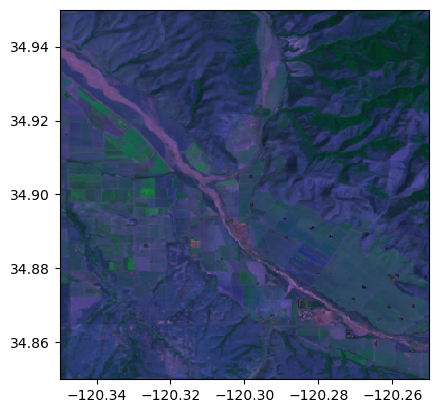

<Axes: >

In [9]:
show(X_2000[:3,...], transform=p['transform'], interpolation='none')

https://storage.googleapis.com/earthenginepartners-hansen/GFC2015/Hansen_GFC2015_treecover2000_30N_120W.tif

https://storage.googleapis.com/earthenginepartners-hansen/GFC2015/Hansen_GFC2014_irst_40N_130W.tif

In [10]:
%%time

bounds = [-120.35, 34.85, -120.25, 34.95]

X_2020, p = get_raster_from_tiles(bounds, 
                                  tile_shortname='hansen_annual_mosaic', 
                                  year=HANSEN_MOSAIC_YEARS[3])
X_2020.shape

Reading tile imagery: 100%|███| 1/1 [00:01<00:00,  1.38s/it]

CPU times: user 123 ms, sys: 87.8 ms, total: 210 ms
Wall time: 3.84 s


(4, 400, 400)

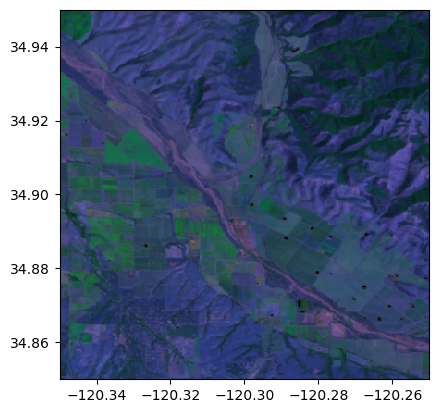

<Axes: >

In [11]:
show(X_2020[:3,...], transform=p['transform'], interpolation='none')

## Treecover 2000

In [12]:
%%time

bounds = [-120.35, 34.85, -120.25, 34.95]

X_tc_2000, p_tc = get_raster_from_tiles(bounds, 
                                        tile_shortname='hansen_treecover_2000')
X_tc_2000.shape

Reading tile imagery: 100%|███| 1/1 [00:01<00:00,  1.34s/it]

CPU times: user 109 ms, sys: 43.2 ms, total: 152 ms
Wall time: 3.71 s


(1, 400, 400)

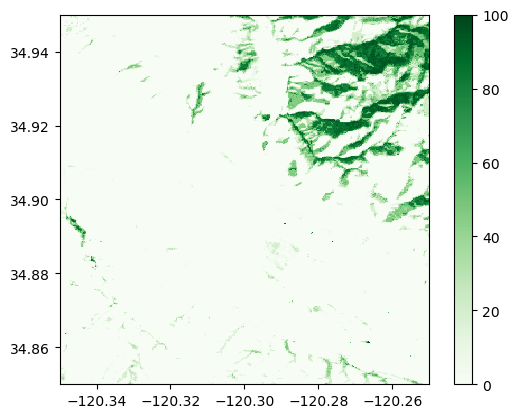

In [13]:
fig, ax = plt.subplots()
plt_data = show(X_tc_2000[0,...], transform=p_tc['transform'], interpolation='none', cmap='Greens', ax=ax)
im = plt_data.get_images()[0]
fig.colorbar(im, ax=ax)

## Lossyear

In [14]:
%%time

bounds = [-120.35, 34.85, -120.25, 34.95]

X_lossyear, p_lossyear = get_raster_from_tiles(bounds, 
                                               tile_shortname='hansen_lossyear')
np.unique(X_lossyear)

Reading tile imagery: 100%|███| 1/1 [00:00<00:00,  1.45it/s]

CPU times: user 95.1 ms, sys: 35.4 ms, total: 130 ms
Wall time: 3.08 s


array([ 0,  1,  2,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22], dtype=uint8)

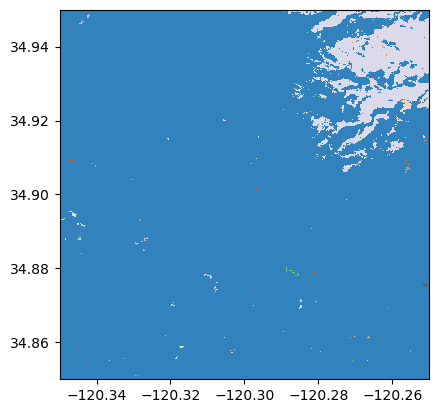

<Axes: >

In [15]:
show(X_lossyear[0,...], transform=p_tc['transform'], interpolation='none', cmap='tab20c')
#im = plt_data.get_images()[0]
#fig.colorbar(im, ax=ax)

## Gain

In [16]:
%%time

bounds = [-120.35, 34.85, -120.25, 34.95]

X_gain, p_gain = get_raster_from_tiles(bounds, 
                                        tile_shortname='hansen_gain')
np.unique(X_gain)

Reading tile imagery: 100%|███| 1/1 [00:00<00:00,  1.70it/s]

CPU times: user 99.5 ms, sys: 41 ms, total: 140 ms
Wall time: 2.77 s


array([0, 1], dtype=uint8)

# Pekel Water Occurence

In [17]:
%%time

bounds = [-120.8, 34.4, -120.5, 35]

X_pekel, p = get_raster_from_tiles(bounds, 
                                   tile_shortname='pekel_water_occ_2021')
X_pekel.shape

Reading tile imagery: 100%|███| 1/1 [00:00<00:00,  1.79it/s]

CPU times: user 129 ms, sys: 50.5 ms, total: 180 ms
Wall time: 3.51 s


(1, 2400, 1200)

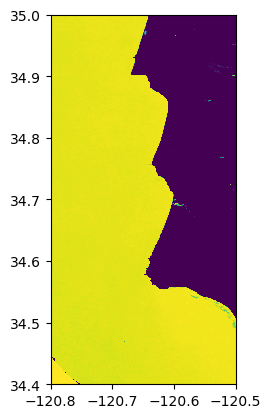

<Axes: >

In [18]:
show(X_pekel, transform=p['transform'], interpolation='none', vmin=0, vmax=100)

# S1 Coherence 2020

It takes a bit longer to load because the tiles for all the various seasons and temporal baselines are stored (and read) together.

In [19]:
%%time

bounds = [-120.8, 34.4, -120.5, 35]

X_coh, p_coh = get_raster_from_tiles(bounds, 
                                     tile_shortname='s1_coherence_2020',
                                     season='fall',
                                     temporal_baseline_days=12)
X_coh.shape

Reading tile imagery: 100%|███| 1/1 [00:00<00:00,  2.76it/s]

CPU times: user 6.05 s, sys: 283 ms, total: 6.34 s
Wall time: 9.29 s


(1, 721, 361)

In [25]:
%%time

bounds = [-120.8, 34.4, -120.5, 35]

X_rmse, p_rmse = get_raster_from_tiles(bounds, 
                                       tile_shortname='s1_coherence_2020',
                                       s1_decay_model_param='rmse',
                                       season='fall')
X_rmse.shape

Reading tile imagery: 100%|███| 1/1 [00:00<00:00,  2.41it/s]

CPU times: user 6.1 s, sys: 219 ms, total: 6.31 s
Wall time: 9.14 s


(1, 721, 361)

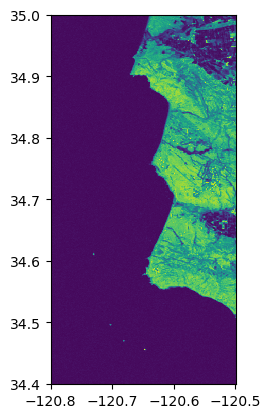

<Axes: >

In [26]:
show(X_coh, 
     transform=p_coh['transform'], 
     interpolation='none', 
     vmin=0, vmax=100)

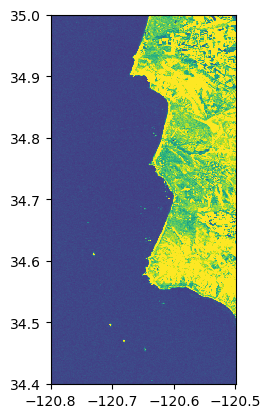

<Axes: >

In [27]:
show(X_rmse, 
     transform=p_rmse['transform'], 
     interpolation='none', 
     vmin=0, vmax=100)

# HAND

In [28]:
%%time


X_hand, p_hand = get_raster_from_tiles(bounds, 
                                       tile_shortname='hand',
                                       )
X_hand.shape

Reading tile imagery: 100%|███| 1/1 [00:01<00:00,  1.31s/it]

CPU times: user 797 ms, sys: 151 ms, total: 948 ms
Wall time: 4.32 s


(1, 2161, 1081)

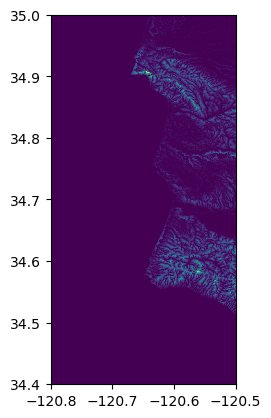

<Axes: >

In [29]:
show(X_hand, 
     transform=p_hand['transform'], 
     interpolation='none',
     cmap='viridis')

# RADD

From the RADD [website](https://data.globalforestwatch.org/datasets/gfw::deforestation-alerts-radd/about):

```
Each pixel (alert) encodes the date of disturbance and confidence level in one integer value. The leading integer of the decimal representation is 2 for a low-confidence alert and 3 for a high-confidence alert, followed by the number of days since December 31, 2014. 0 is the no-data value. For example:

* 20001 is a low confidence alert on January 1st, 2015
* 30055 is a high confidence alert on February 24, 2015
* 21847 is a low confidence alert on January 21, 2020
* 0 represents no alert
```

In [30]:
%%time

amzn_bounds = [-53, -2, -52.95, -1.95]

X_radd, p_radd = get_raster_from_tiles(amzn_bounds, 
                                       tile_shortname='radd_deforestation_alerts_2022',
                                       )
np.unique(X_radd)

Reading tile imagery: 100%|███| 1/1 [00:00<00:00,  1.01it/s]

CPU times: user 83.6 ms, sys: 25.1 ms, total: 109 ms
Wall time: 5.65 s


array([    0, 23787, 32023, 32035, 32047, 32059, 32071, 32083, 32131,
       32155, 32167, 32275, 32323, 32461, 32779, 32791, 32803, 32827,
       32839, 32851, 32863, 32875, 32887, 32899, 32911, 32923, 32935,
       32947, 32959, 32971, 32983, 33067, 33079, 33103, 33115, 33127,
       33139, 33151, 33163, 33175, 33187, 33199, 33211, 33247, 33259,
       33271, 33283, 33295, 33307, 33319, 33487, 33499, 33511, 33523,
       33535, 33547, 33583, 33607, 33619], dtype=uint16)

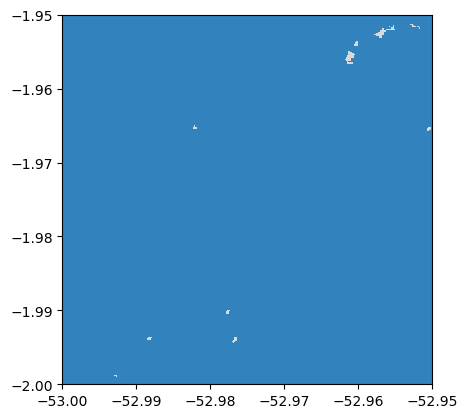

<Axes: >

In [31]:
show(X_radd, 
     transform=p_radd['transform'], 
     interpolation='none',
     cmap='tab20c')

# GLAD LCLUC

https://storage.googleapis.com/earthenginepartners-hansen/GLCLU2000-2020/v2/download.html

## Land cover

In [4]:
bounds = [-120.55, 34.85, -120.25, 35.15]

X_glad_lc, p_glad_lc  = get_raster_from_tiles(bounds, 
                                              tile_shortname='glad_landcover',
                                              year=2015
                                              )

Reading tile metadata: 100%|█| 1/1 [00:00<00:00,
Reading tile imagery: 100%|█| 1/1 [00:00<00:00, 


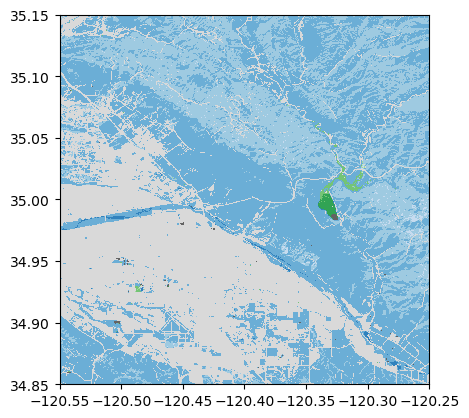

<Axes: >

In [5]:
show(X_glad_lc, 
     transform=p_glad_lc['transform'], 
     interpolation='none',
     cmap='tab20c')

## Land change

In [6]:
bounds = [-120.55, 34.85, -120.25, 35.15]

X_glad_c, p_glad_c  = get_raster_from_tiles(bounds, 
                                            tile_shortname='glad_change'
                                            )

Reading tile metadata: 100%|█| 1/1 [00:00<00:00,
Reading tile imagery: 100%|█| 1/1 [00:00<00:00, 


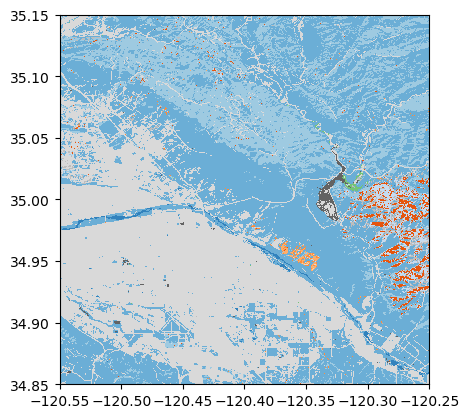

<Axes: >

In [7]:
show(X_glad_c, 
     transform=p_glad_c['transform'], 
     interpolation='none',
     cmap='tab20c')

# UMD Ocean Mask

In [6]:
bounds = [-181, 51.25, -179, 51.75]

X_om, p_om = get_raster_from_tiles(bounds, 
                                   tile_shortname='umd_ocean_mask',
                                  )

/Users/cmarshak/bekaert-team/tile-mate/src/tile_mate/stitcher.py:163: UserWarning: Getting tiles across dateline on the opposite hemisphere; The source tiles will be 360 deg along thelongitudinal axis from the extent requested
  warnings.warn(
Reading tile metadata:   0%| | 0/2 [00:00<?, ?it/Users/cmarshak/miniforge3/envs/tile-mate/lib/python3.13/site-packages/dem_stitcher/rio_window.py:144: RuntimeWarning: Requesting extent beyond raster bounds of [-190.0, 50.0, -180.0, 60.0]. Shrinking bounds in raster crs to (-181.0, 51.25, -180.0, 51.75).
  warn(
Reading tile metadata: 100%|█| 2/2 [00:00<00:00,
Reading tile imagery: 100%|█| 2/2 [00:00<00:00, 


In [7]:
np.unique(X_om)

array([0, 1, 2, 3, 4], dtype=uint8)

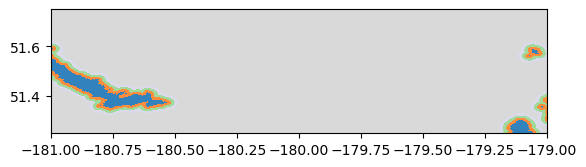

<Axes: >

In [8]:
show(X_om, 
     transform=p_om['transform'], 
     interpolation='none',
     cmap='tab20c')

`k = 0, 1, 2, 3, 4` are the values indicating the (floored) distance from land to ocean with a maximum of 4. Pixels that are either 3, 4 mean that all these pixels are at least 3 km from land.

## Possible Wetlands Mask for OPERA

In [36]:
alberta_bounds = [-111.34, 58.674,-111.52, 58.49]
X_glad_lc, p_glad_lc  = get_raster_from_tiles(alberta_bounds, 
                                            tile_shortname='glad_landcover',
                                            year=2020
                                            )

Reading tile imagery: 100%|███| 1/1 [00:01<00:00,  1.58s/it]


In [37]:
np.unique(X_glad_lc)

array([ 22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,
        35,  36,  37,  38,  39,  40,  41, 100, 108, 111, 112, 113, 114,
       115, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 200,
       201, 202, 203, 204, 205, 206, 207], dtype=uint8)

In [38]:
wtlnd_mask = ((X_glad_lc >= 100) & (X_glad_lc <= 211)) | (X_glad_lc == 254)

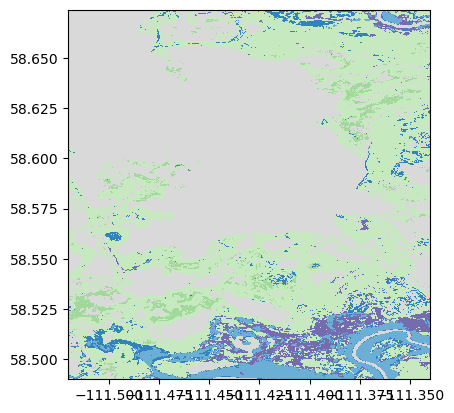

<Axes: >

In [39]:
show(X_glad_lc, 
     transform=p_glad_lc['transform'], 
     interpolation='none',
     cmap='tab20c')

Below "yellow" is where the mask is 1 and "blue" is where the mask i 0.

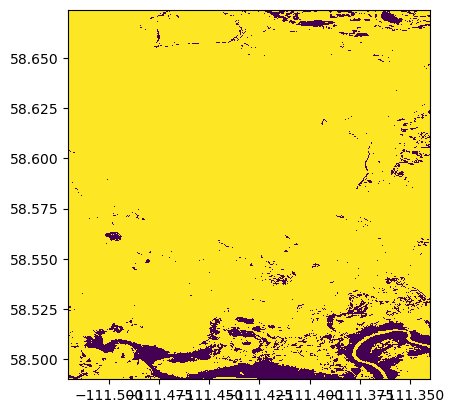

<Axes: >

In [40]:
show(wtlnd_mask, 
     transform=p_glad_lc['transform'], 
     interpolation='none',
     cmap='viridis')